discarded because it doesn't actually use a mask for evaluation.

not interesting.

Warning message in scale_x_continuous(trans = "log2"):
“log-2 transformation introduced infinite values.”
Warning message in scale_x_continuous(trans = "log2"):
“log-2 transformation introduced infinite values.”
Warning message in scale_x_continuous(trans = "log2"):
“log-2 transformation introduced infinite values.”
Warning message in scale_x_continuous(trans = "log2"):
“log-2 transformation introduced infinite values.”


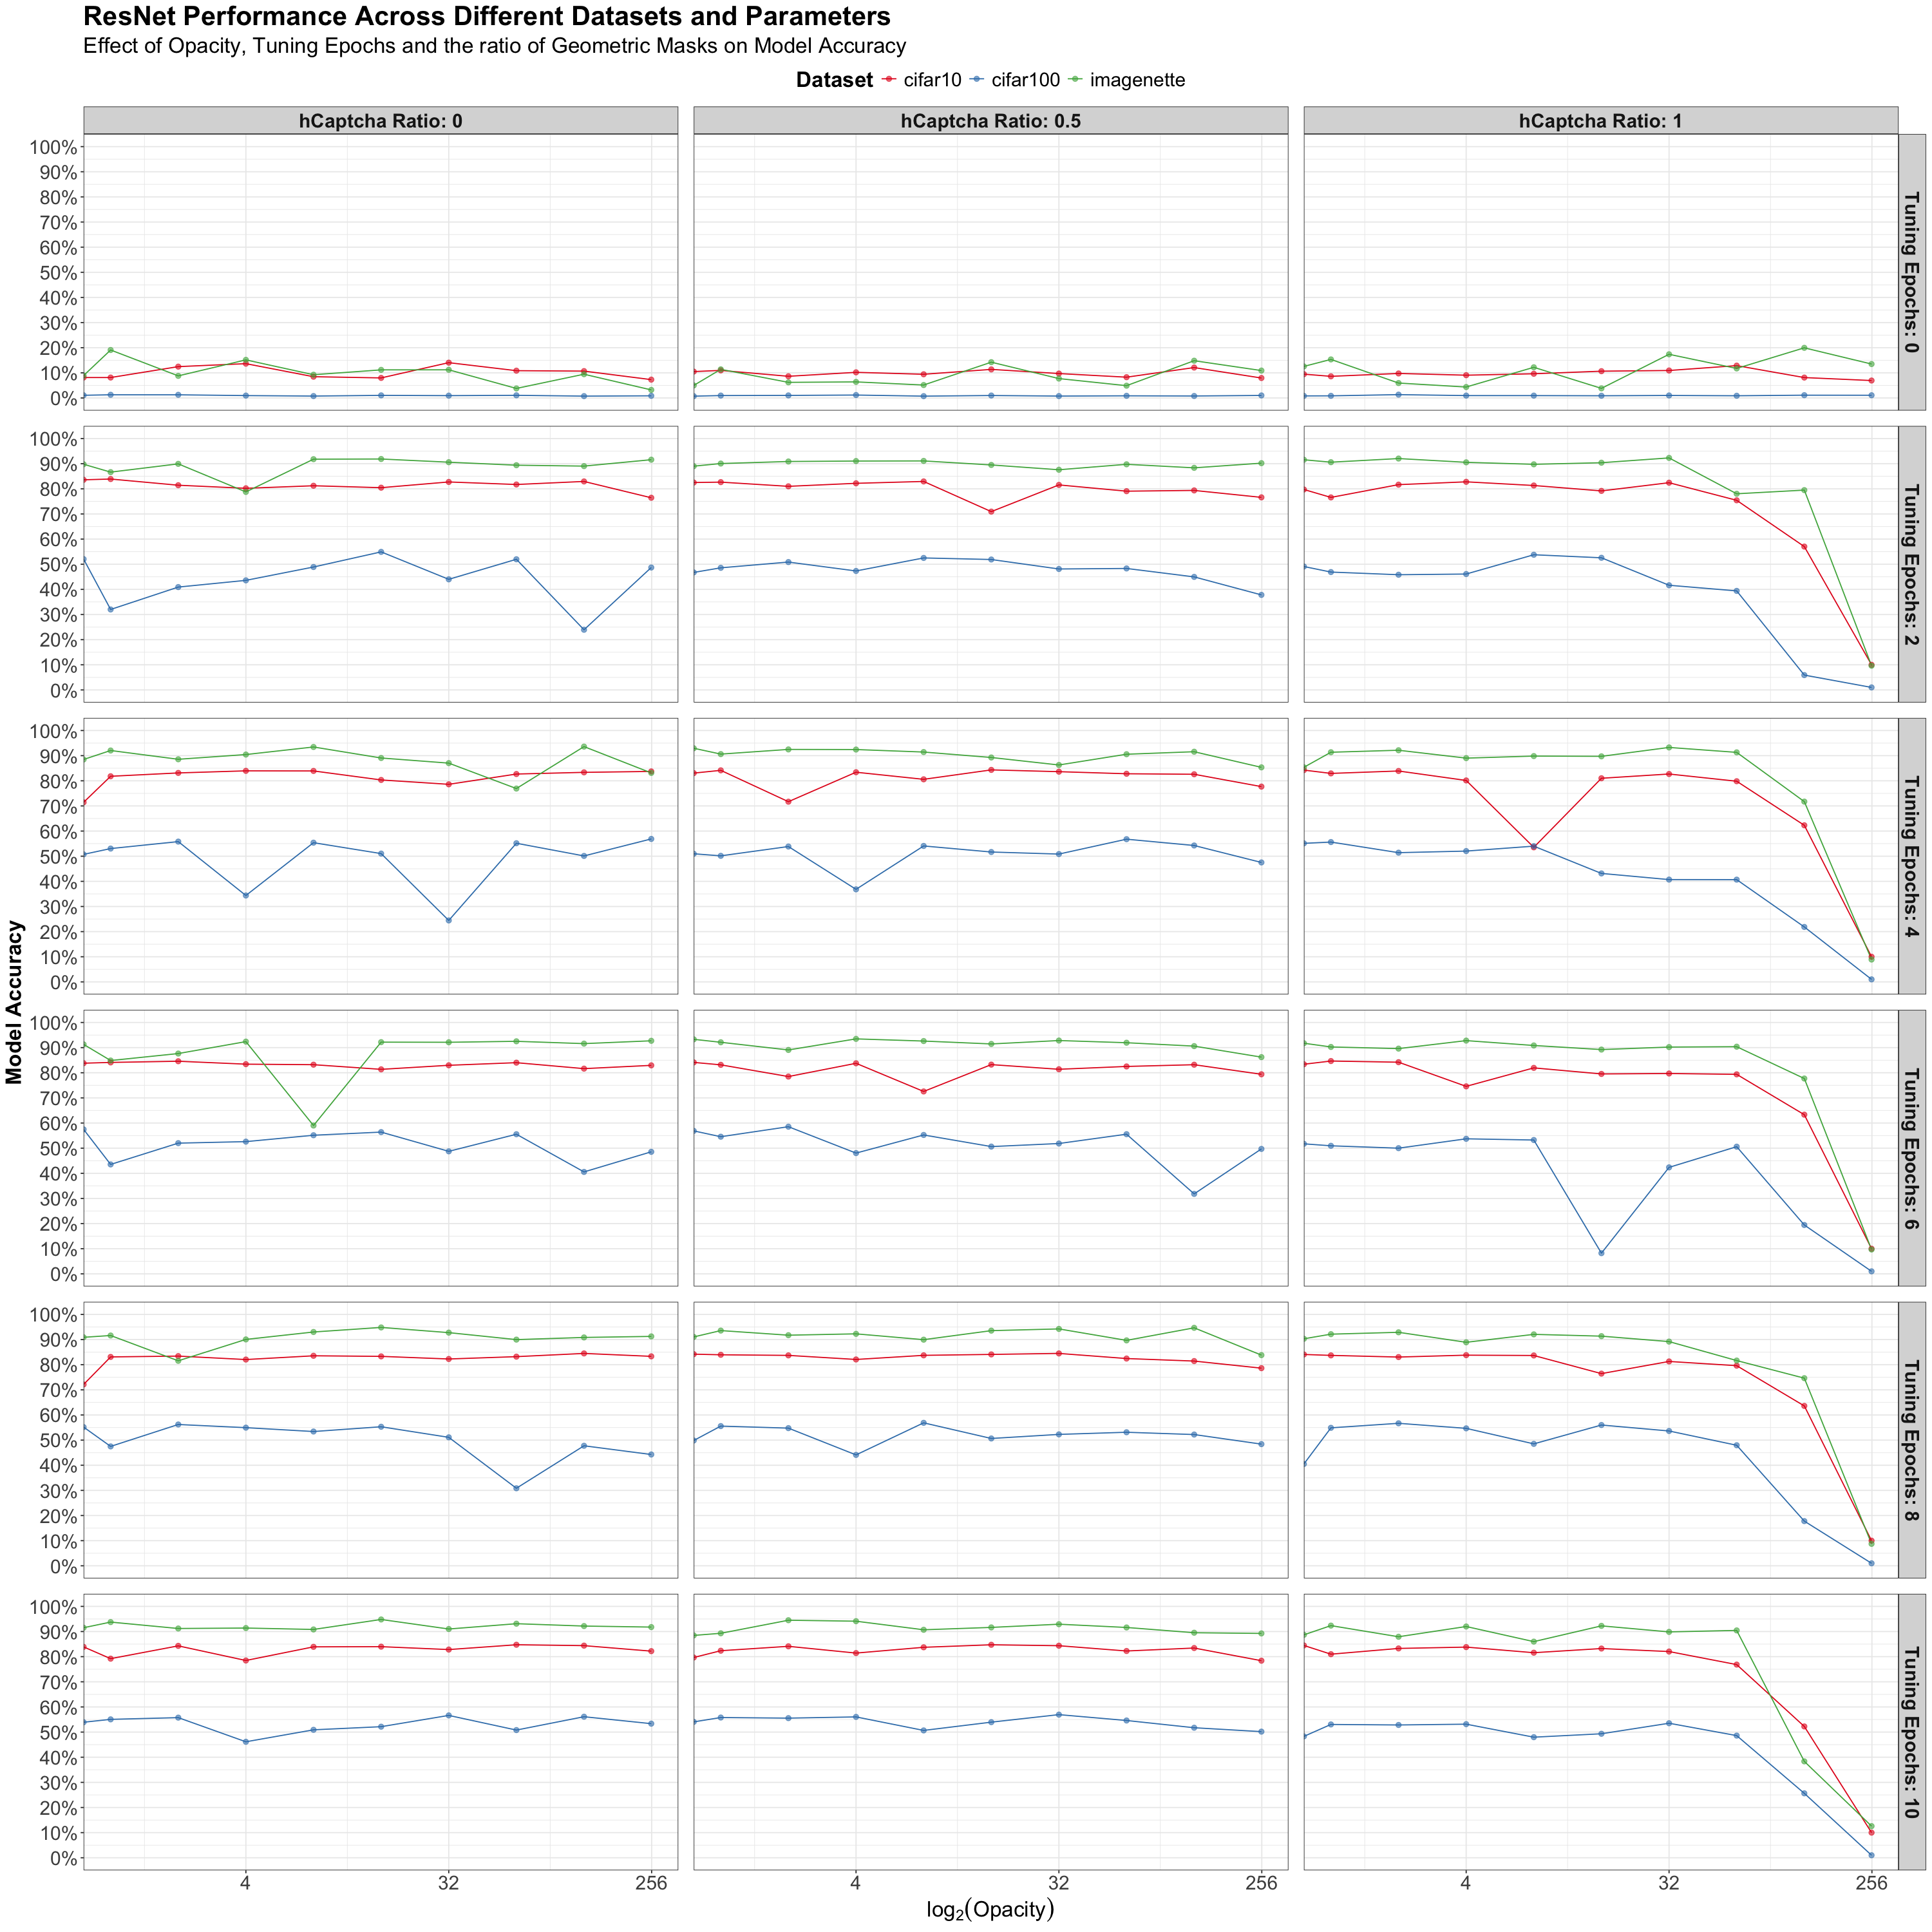

In [7]:
deps <- c("ISLR", "ndjson", "ggplot2", "dplyr", "caret", "tidyr", "gridExtra", "data.table", "repr")
for (p in deps) {
    if (!requireNamespace(p, quietly = TRUE)) {
        install.packages(p, repos = "https://cran.rstudio.com")
    }
    library(p, character.only = TRUE)
}
options(scipen=999)
options(repr.plot.width=25, repr.plot.height=25)

df <- ndjson::stream_in("./no-mask-eval.jsonl")

ggplot(df, aes(x = opacity, y = accuracy, color = dataset)) +
    geom_line(size = 0.5) +
    geom_point(size = 2, alpha = 0.6) +
    facet_grid(
        tune_epochs ~ tune_hcaptcha_ratio, # this is the grid
        labeller = labeller(tune_epochs = function(x) paste("Tuning Epochs:", x), tune_hcaptcha_ratio = function(x) paste("hCaptcha Ratio:", x))
    ) +
    scale_y_continuous(
        limits = c(0, 1),
        breaks = seq(0, 1, 0.1),
        labels = scales::percent_format(accuracy = 1)
    ) +
    scale_x_continuous(trans = "log2") +
    labs(
        title = "ResNet Performance Across Different Datasets and Parameters",
        subtitle = "Effect of training epochs, opacity, ratio of geometric masks on evaluation (without masks)",
        x = expression(log[2]("Opacity")),
        y = "Model Accuracy",
        color = "Dataset",
    ) +
    theme_bw() +
    theme(
        plot.title = element_text(size = 25, face = "bold"),
        plot.subtitle = element_text(size = 20),
        axis.title = element_text(size = 20, face = "bold"),
        axis.text = element_text(size = 18),
        legend.title = element_text(size = 20, face = "bold"),
        legend.text = element_text(size = 18),
        strip.text = element_text(size = 18, face = "bold"),
        panel.spacing = unit(1, "lines"),
        legend.position = "top"
    ) +
    scale_color_brewer(palette = "Set1")

ggsave("resnet.pdf", width = 25, height = 25)